<a href="https://colab.research.google.com/github/jinsumin81/BD-team/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
!pip install koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.precision', 2)

In [16]:
ttn= pd.read_csv('titanic1309.csv')

In [17]:
ttn.info

<bound method DataFrame.info of       PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket    Fare Cabin Embarked  
0         0           A/5 21171    7.25   NaN        S  
1         0            PC 17599   71.28   C85        C  
2         0    STON/O2. 3101282    7.92   NaN        S  
3         0              113803   53.10  C123        S  
4         0              373450    8.05   NaN        S  
...     ...                 ...     ...   ...      ...  
1304      0           A.5. 3236    8.05   NaN        S  
1305      0            PC 17758  108.90  C105        C  
1306      0  SOTON/O.Q. 3101262    7.25   NaN        S  
1307      0              359309    8.05   NaN        S  
1308      1                2668   22.36   NaN        C  

[1309 rows x 12 columns]>

In [18]:
ttn.groupby(['Sex', 'Pclass'])['Survived'].sum()

Sex     Pclass
female  1         141
        2         100
        3         144
male    1          45
        2          17
        3          47
Name: Survived, dtype: int64

#탑승객 분석

### 성별과 좌석등급의 관계

In [19]:
ttn['Sex'].value_counts() # 성별

,count
Sex,
male,843
female,466


In [20]:
ttn['Pclass'].value_counts().sort_index() #좌석 등급

,count
Pclass,
1,323
2,277
3,709


In [21]:
ttn.groupby(['Sex', 'Pclass']).size().unstack() #성별별로 좌석 등급

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


<Axes: xlabel='Sex', ylabel='count'>

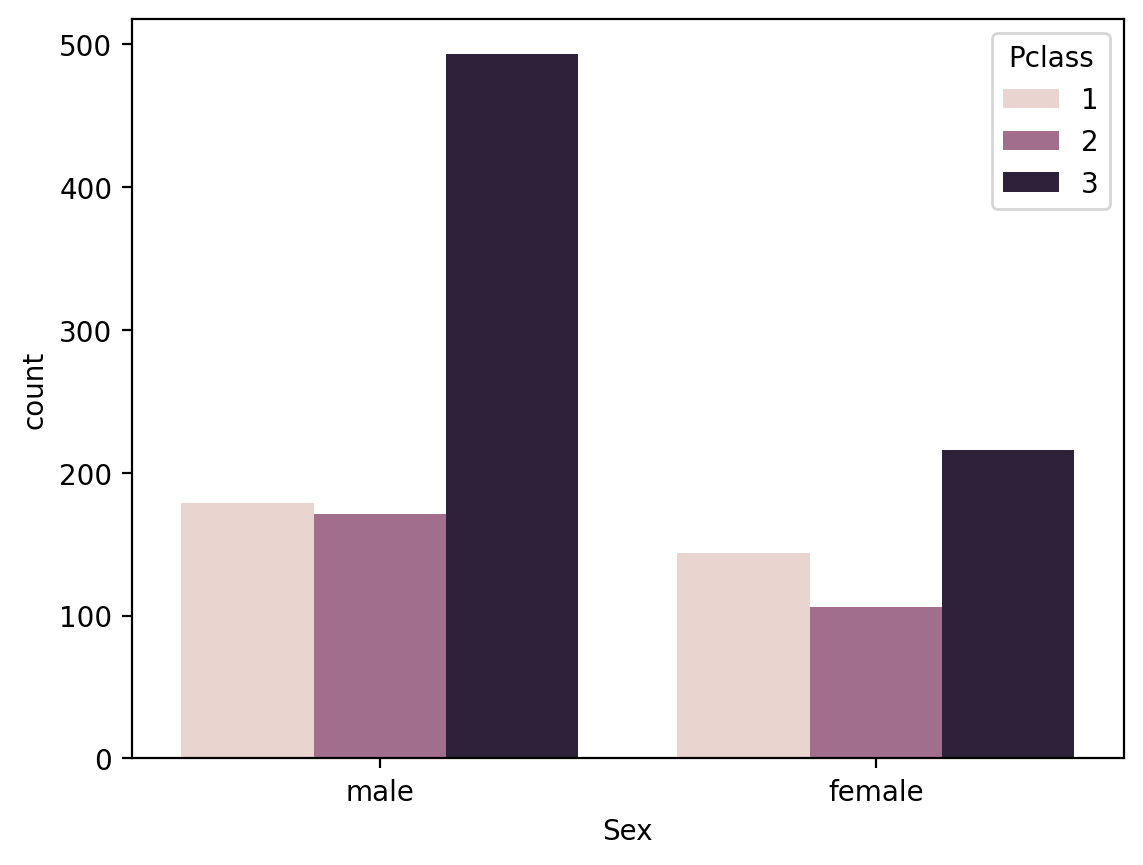

In [22]:
sns.countplot(ttn,x='Sex',hue='Pclass')

### 나이과 성별 관계

In [23]:
ttn['Age'].isnull().sum() # 나이열의 결측치 수

np.int64(263)

In [24]:
ttn1 = ttn.dropna(subset=['Age']).copy() # 나이 열의 결측치 제거

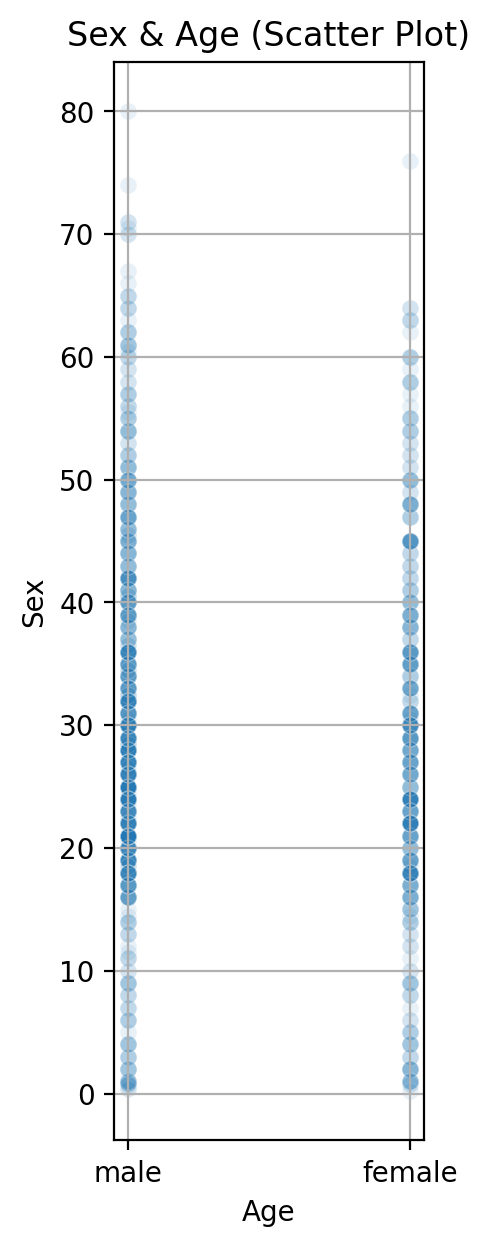

In [25]:
plt.figure(figsize=(2, 7))
sns.scatterplot(x='Sex', y='Age', data=ttn1, alpha=0.1)

plt.title('Sex & Age (Scatter Plot)')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.grid(True)
plt.show()


In [26]:
ttn1['AgeGroup'] = ''

# 4. iloc 사용해 나이대 구분 (열 위치로 직접 설정)
agegroup_col_index = ttn1.columns.get_loc('AgeGroup')  # 'AgeGroup' 열의 위치 인덱스

for i in range(len(ttn1)):
    age = ttn1.iloc[i]['Age']
    if age <= 10:
        ttn1.iloc[i, agegroup_col_index] = '0-10'
    elif age <= 20:
        ttn1.iloc[i, agegroup_col_index] = '11-20'
    elif age <= 30:
        ttn1.iloc[i, agegroup_col_index] = '21-30'
    elif age <= 40:
        ttn1.iloc[i, agegroup_col_index] = '31-40'
    elif age <= 50:
        ttn1.iloc[i, agegroup_col_index] = '41-50'
    elif age <= 60:
        ttn1.iloc[i, agegroup_col_index] = '51-60'
    elif age <= 70:
        ttn1.iloc[i, agegroup_col_index] = '61-70'
    else:
        ttn1.iloc[i, agegroup_col_index] = '71-80'

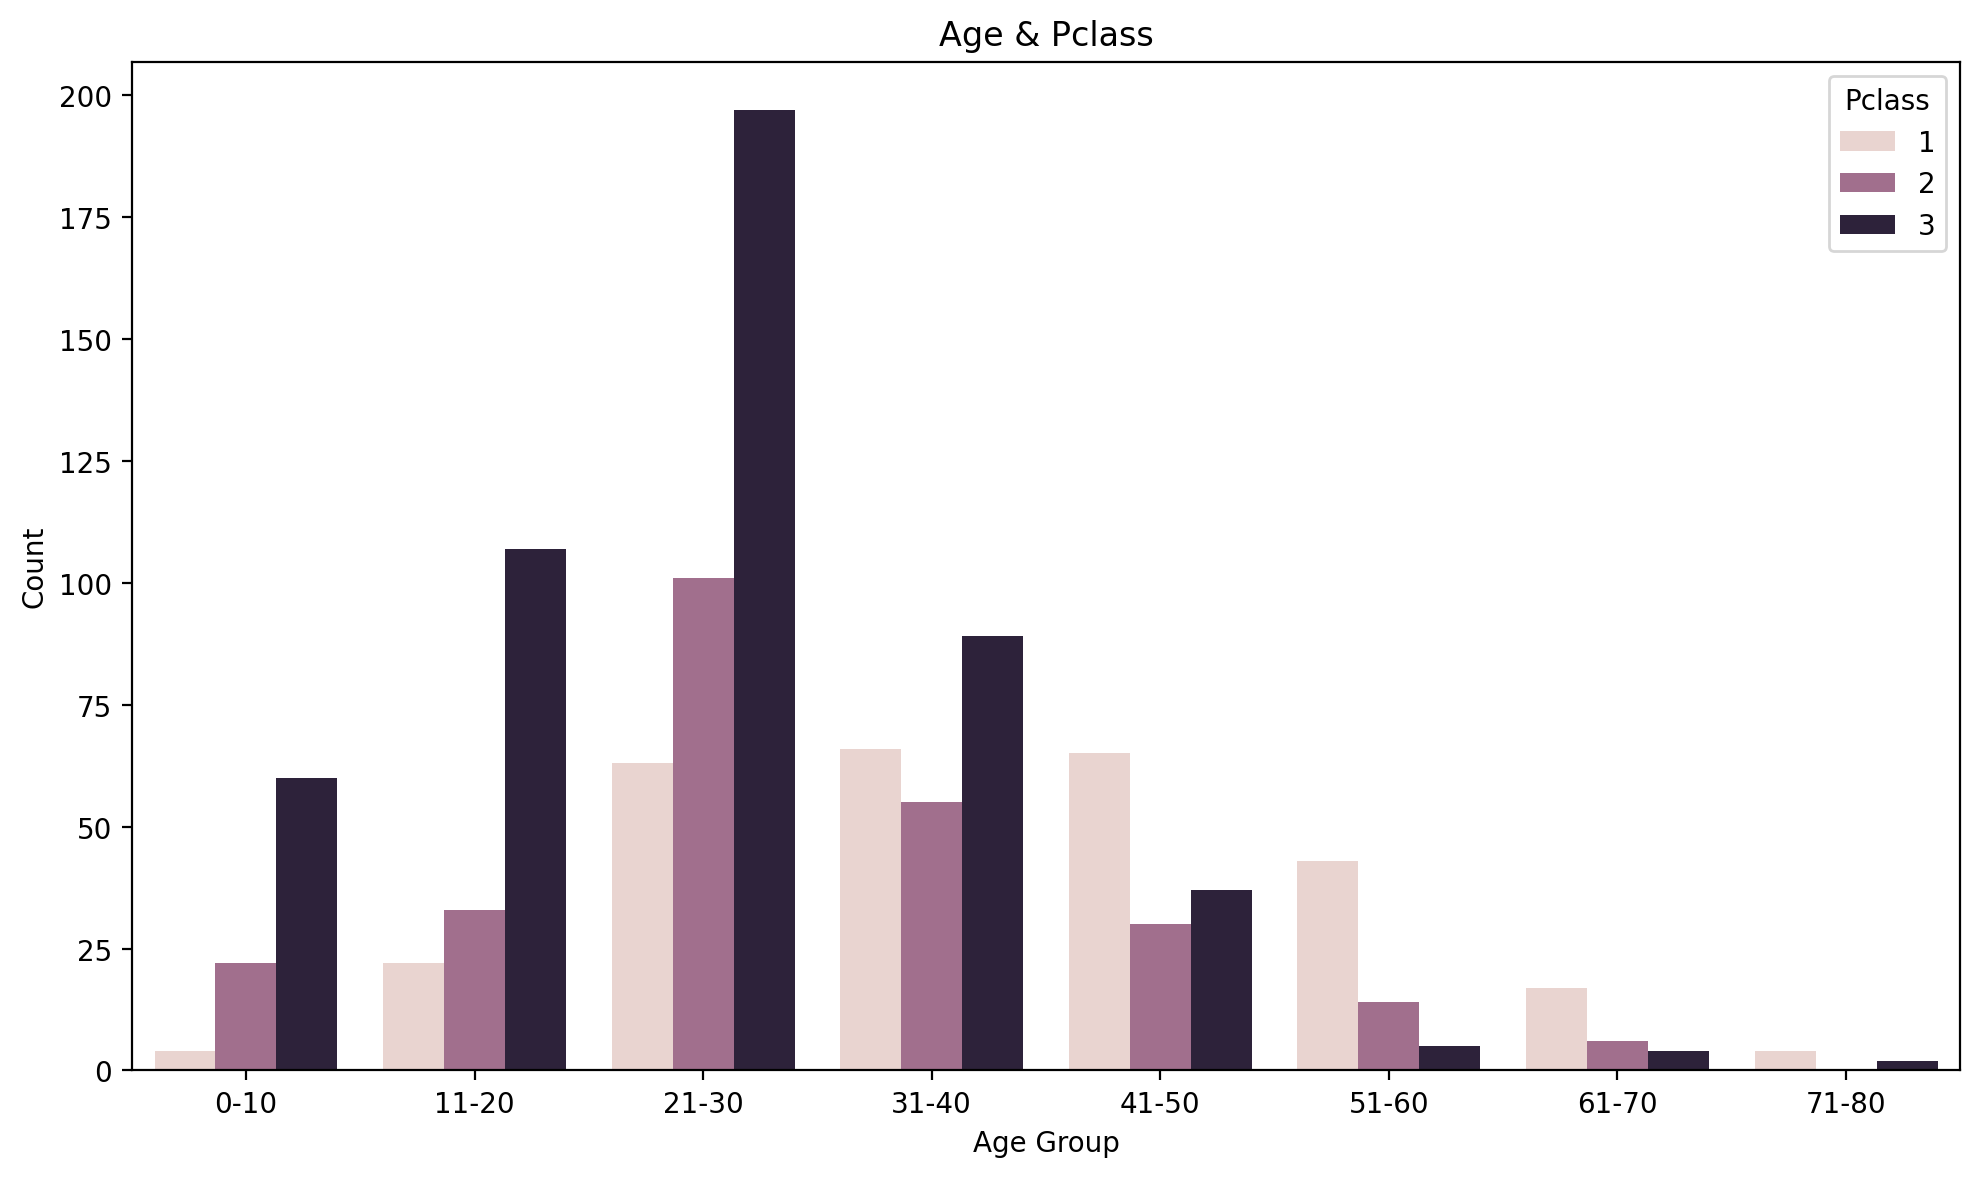

In [27]:
labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='Pclass', data=ttn1, order=labels)
plt.title('Age & Pclass')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.tight_layout()
plt.show()

* 전체 탑승자 중 남성의 비율이 여성보다 현저히 높았으며, 이는 타이타닉 승객 구성에서 **남성이 다수를 차지했음을 보여준다.**
* 1등석과 2등석에서는 남성과 여성의 탑승자 비율이 비교적 균형을 이루었으나,
 **3등석에서는 남성 탑승자가 여성보다 압도적으로 많았다.**
* 나이대별로는 20대 승객이 가장 많았으며, **특히 20대 남성의 비중이 가장 높은 연령-성별 조합으로 나타났다.**
* 이에 예상할 수 있듯 20대 연령대에서 3등석을 제일 많이 앉았다

#사망자 수 분석

In [28]:
ttn2 = ttn.dropna(subset=['Age', 'Pclass', 'Sex', 'Survived', 'Embarked'])

In [29]:
ttn2.groupby('Sex')['Survived'].count()

,Survived
Sex,
female,386
male,658


In [39]:
print(ttn.groupby(['Pclass', 'Survived']).size())

Pclass  Survived
1       0           137
        1           186
2       0           160
        1           117
3       0           518
        1           191
dtype: int64


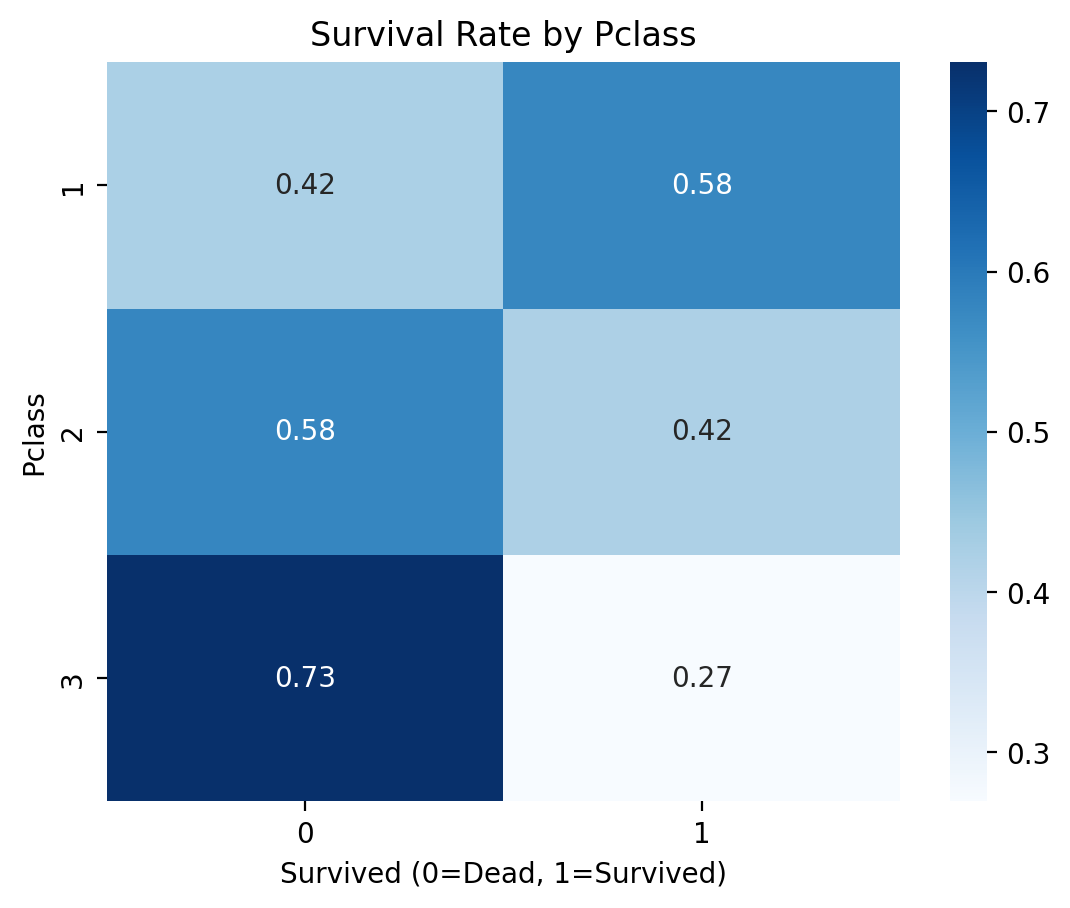

In [36]:
grouped = ttn.groupby(['Pclass', 'Survived']).size()
ratio = grouped / grouped.groupby(level=0).sum()

ratio_df = ratio.unstack()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(ratio_df, annot=True, cmap='Blues', fmt=".2f")
plt.title('Survival Rate by Pclass')
plt.xlabel('Survived (0=Dead, 1=Survived)')
plt.ylabel('Pclass')
plt.show()
